In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **About Dataset**


*   This dataset contains Export quality mango prices.
*   Different types of mangos are grown in different regions of SriLanka


*   Prices are per kilogram.









Locate the file in Google drive

In [3]:
path = "drive/MyDrive/colab_datasets"

In [4]:
data = pd.read_excel(path+"/priceData_v01_mango.xlsx")
data.head()

,Unnamed: 0,broker,weekNo,lotNo,FarmNmae,grade,bagWeight,nettWeight,Price,DistrictRegion
0,0.0,FW,29.0,2519.0,OPATA SPECIAL,OTHER,10.0,24.0,360.0,Low
1,1.0,JK,29.0,1311.0,GLENANORE,OTHER,10.0,30.0,420.0,UvaHigh
2,2.0,JK,29.0,1312.0,GLENANORE,OTHER,20.0,30.0,450.0,UvaHigh
3,3.0,LC,28.0,151.0,KURUGAMA,OTHER,10.0,32.0,500.0,Medium
4,4.0,AS,27.0,1069.0,RATHMALGODA SUPER,OTHER,10.0,45.0,620.0,Low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1018 non-null   float64
 1   broker          1018 non-null   object 
 2   weekNo          1018 non-null   float64
 3   lotNo           1018 non-null   float64
 4   FarmNmae        1018 non-null   object 
 5   grade           1018 non-null   object 
 6   bagWeight       1018 non-null   float64
 7   nettWeight      1018 non-null   float64
 8   Price           1018 non-null   float64
 9   DistrictRegion  993 non-null    object 
dtypes: float64(6), object(4)
memory usage: 79.7+ KB


In this study I will be only using the following columns   


1. Price (target variable)
2. DistrictRegion (Independant variable)
3. grade (Independant variable)






In [6]:
data = data[['grade','DistrictRegion','Price']]

In [7]:
#size of dtatset
data.shape

(1018, 3)

# Data cleaning and Preperation

In [8]:
#count the numbers of null values
#data.isna().sum()
data.isnull().sum()

grade              0
DistrictRegion    25
Price              0
dtype: int64

In [9]:
'''
Since DistrictRegion column is a categorical column filling the
missing values with the most frequent occorence will be most appropreate
'''
data = data.fillna(data.mode().iloc[0])

In [10]:
data.isnull().sum()

grade             0
DistrictRegion    0
Price             0
dtype: int64

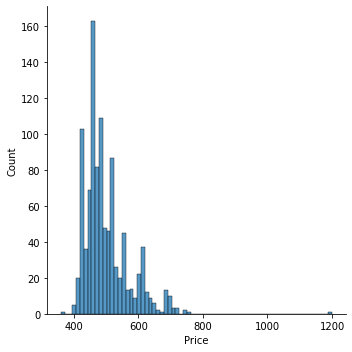

In [11]:
'''
Lets now look at the distribution of price feature
'''
sns.displot(data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


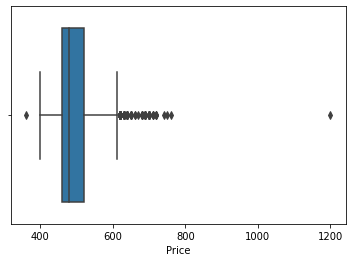

In [12]:
'''
As per the plot, price is not eactly a normal distribution
we have to find if we any outliers and treat it

Outliers can be detected by several methods such as
1. Scatter plots
2. Z-score
3. IQR (Inter quartile range)

We will be usnig IQR method
'''
B_plot = sns.boxplot(data.Price)


In [13]:
#Outlier removal

#finding the IQR
p_25 = data['Price'].quantile(0.25)
p_75 = data['Price'].quantile(0.75)
iqr = p_75 - p_25

#setting up the upper and lower limits
upper_limit = p_75 + 1.5 * iqr
lower_limit = p_25 - 1.5 * iqr

#finding outliers
data[data['Price'] > upper_limit]
data[data['Price'] < lower_limit]

#Trimming 
trimmed_data = data[data['Price'] < upper_limit]
trimmed_data = trimmed_data[trimmed_data['Price'] > lower_limit]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


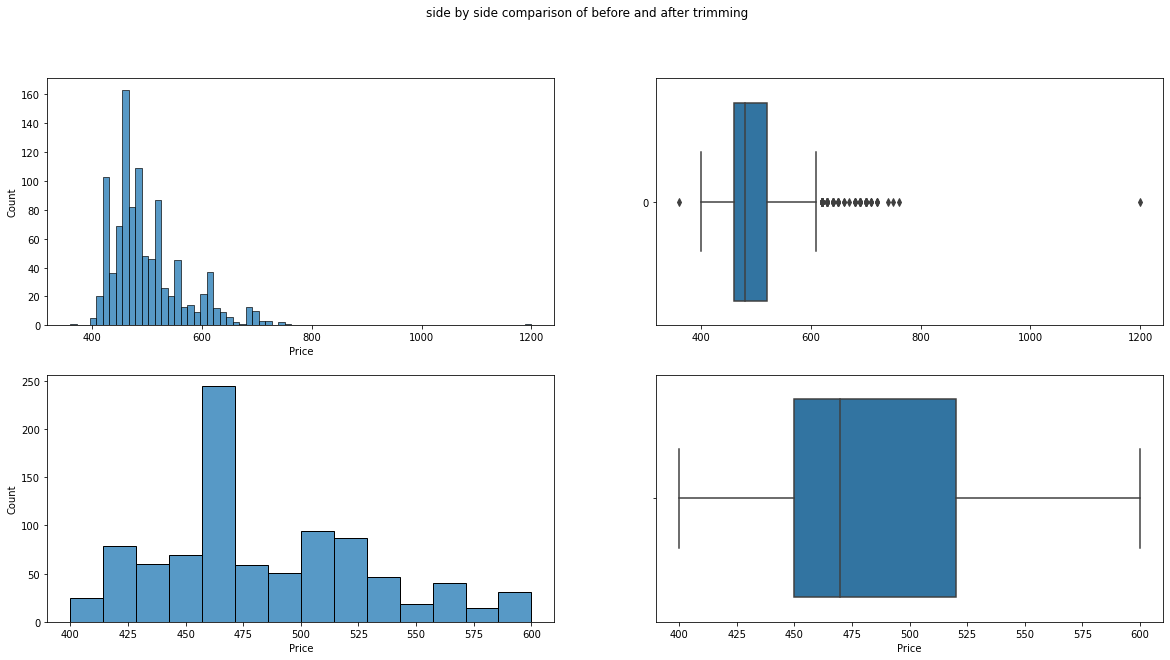

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('side by side comparison of before and after trimming')

sns.histplot(ax=axes[0, 0],data = data.Price)
sns.boxplot(ax=axes[0, 1], data=data.Price,orient="h")
sns.histplot(ax=axes[1, 0], data=trimmed_data.Price)
sns.boxplot(trimmed_data.Price)



In [15]:
trimmed_data.shape

(917, 3)

#**A simple analysis on cleaned data**

In [29]:
unique_grades = trimmed_data["grade"].unique()
unique_grades

array(['OTHER', 'Malwana', 'Giraamba', 'Dampara', 'Horanahiru',
       'Karthacolomban', 'TOM EJC', 'Velleicolomban', 'Villard'],
      dtype=object)

In [30]:
unique_regions = trimmed_data["DistrictRegion"].unique()
unique_regions

array(['UvaHigh', 'Medium', 'Low', 'high', 'WesternHigh', 'WesternMedium',
       'UvaMedium'], dtype=object)

In [27]:
pd.unique(trimmed_data[['grade', 'DistrictRegion']].values.ravel('K'))

array(['OTHER', 'Malwana', 'Giraamba', 'Dampara', 'Horanahiru',
       'Karthacolomban', 'TOM EJC', 'Velleicolomban', 'Villard',
       'UvaHigh', 'Medium', 'Low', 'high', 'WesternHigh', 'WesternMedium',
       'UvaMedium'], dtype=object)

In [ ]:
trimmed_data.groupby("DistrictRegion")["grade"].value_counts()


DistrictRegion  grade         
Low             OTHER              45
                Giraamba           15
                Dampara            14
                TOM EJC            13
                Horanahiru         12
                Villard             8
                Velleicolomban      5
                Karthacolomban      4
                Malwana             1
Medium          OTHER              53
                TOM EJC            15
                Horanahiru         14
                Giraamba            6
                Dampara             4
                Malwana             4
                Villard             4
                Karthacolomban      3
                Velleicolomban      2
UvaHigh         Villard            12
                Velleicolomban      8
                Malwana             7
                Dampara             5
                Horanahiru          5
                OTHER               4
                Karthacolomban      1
UvaMedium       OTH

# **One Hot Encording**
Since both the independant variables DistrictRegion and grade are categorical encoding technique will be used 

In [ ]:
# Create a categorical boolean mask only for required features
# easy to impliment when new data coming in with new categorical variables
categorical_feature_mask = trimmed_data.dtypes == object

# Filter out the categorical columns into a list for easy reference later on in case
# if we have more than two categorical columns
categorical_cols = trimmed_data.columns[categorical_feature_mask].tolist()
categorical_cols

# Instantiate the OneHotEncoder Object
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

# Apply One Hot Encorder on data
# and fit and transform
ohe.fit(trimmed_data[categorical_cols])
cat_ohe = ohe.transform(trimmed_data[categorical_cols])
#cat_ohe

#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names(input_features = categorical_cols))
#ohe_df



In [ ]:
#concat with original data and drop original categorical columns
trimmed_data.reset_index(drop=True, inplace=True)
ohe_df.reset_index(drop=True, inplace=True)
df_ohe = pd.concat([trimmed_data, ohe_df], axis=1).drop(columns = categorical_cols, axis=1)
df_ohe

,Price,grade_Dampara,grade_Giraamba,grade_Horanahiru,grade_Karthacolomban,grade_Malwana,grade_OTHER,grade_TOM EJC,grade_Velleicolomban,grade_Villard,DistrictRegion_Low,DistrictRegion_Medium,DistrictRegion_UvaHigh,DistrictRegion_UvaMedium,DistrictRegion_WesternHigh,DistrictRegion_WesternMedium,DistrictRegion_high
0,420.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,480.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,490.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
913,460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
914,460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
915,420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Model Building**

In [ ]:
#define the indipendant and target variable
X = df_ohe.drop(['Price'], inplace=False, axis='columns')
y = df_ohe[["Price"]]

In [ ]:
#split the data into trainig set and testing set
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
# Just for fun Ill be using a bunch of models to see which one is doing a great job

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " model trained successfully.")

                     Linear Regression model trained successfully.
 Linear Regression (L2 Regularization) model trained successfully.
 Linear Regression (L1 Regularization) model trained successfully.
                   K-Nearest Neighbors model trained successfully.
                        Neural Network model trained successfully.
Support Vector Machine (Linear Kernel) model trained successfully.
   Support Vector Machine (RBF Kernel) model trained successfully.
                         Decision Tree model trained successfully.
                         Random Forest model trained successfully.
                     Gradient Boosting model trained successfully.
[05:53:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                               XGBoost model trained successfully.


In [ ]:
#Printing the model and its perfomance score

for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2 Score: 0.20803
 Linear Regression (L2 Regularization) R^2 Score: 0.21462
 Linear Regression (L1 Regularization) R^2 Score: 0.18511
                   K-Nearest Neighbors R^2 Score: -0.04103
                        Neural Network R^2 Score: -22.20299
Support Vector Machine (Linear Kernel) R^2 Score: -0.41398
   Support Vector Machine (RBF Kernel) R^2 Score: 0.17438
                         Decision Tree R^2 Score: 0.16923
                         Random Forest R^2 Score: 0.18118
                     Gradient Boosting R^2 Score: 0.20749
                               XGBoost R^2 Score: 0.21103


# **Conclution**
1. None of the above regression models are performing better, becouse the r^2 values are not very close to 1.
2. Howevr we can see that some of the models are better than the other.
3. The negative r^2 values indicates that the model has completely messed.